<a href="https://colab.research.google.com/github/derege1/DSA210_Fall_Project/blob/main/dsa_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from meteostat import Point, Daily
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import requests

file_path = "/Streaming_History_Audio_2024_5.json"
spotify_data = pd.read_json(file_path)

# Convert 'ts' column to datetime
spotify_data['timestamp'] = pd.to_datetime(spotify_data['ts'])

# Convert to timezone-naive datetime
spotify_data['timestamp'] = spotify_data['timestamp'].dt.tz_localize(None)

# ... (your genre_mapping dictionary) ...

# Filter last 3 months of data (90 days)
end_date = datetime.now()
start_date = end_date - timedelta(days=90)
last_3_months_data = spotify_data[(spotify_data['timestamp'] >= start_date) & (spotify_data['timestamp'] <= end_date)]

# Step 1: Filter top 50 artists from the last 3 months
top_50_artists = last_3_months_data.groupby('master_metadata_album_artist_name')['ms_played'].sum().nlargest(50).reset_index()

# Step 2: Map genres to the top 50 artists and calculate total listening time per genre
top_50_artists_with_genres = top_50_artists.merge(last_3_months_data[['master_metadata_album_artist_name', 'genre']], on='master_metadata_album_artist_name', how='left')
genre_stats_top_50 = top_50_artists_with_genres.groupby('genre')['ms_played'].sum().reset_index()
genre_stats_top_50['hours_played'] = genre_stats_top_50['ms_played'] / (1000 * 60 * 60)  # Convert ms to hours

# Step 3: Plot the total listening time for each genre among the top 50 artists
plt.figure(figsize=(14, 8))
sns.barplot(data=genre_stats_top_50, x='genre', y='hours_played', palette="muted")
plt.title('Listening Time by Genre (Top 50 Artists)')
plt.xlabel('Genre')
plt.ylabel('Total Listening Hours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

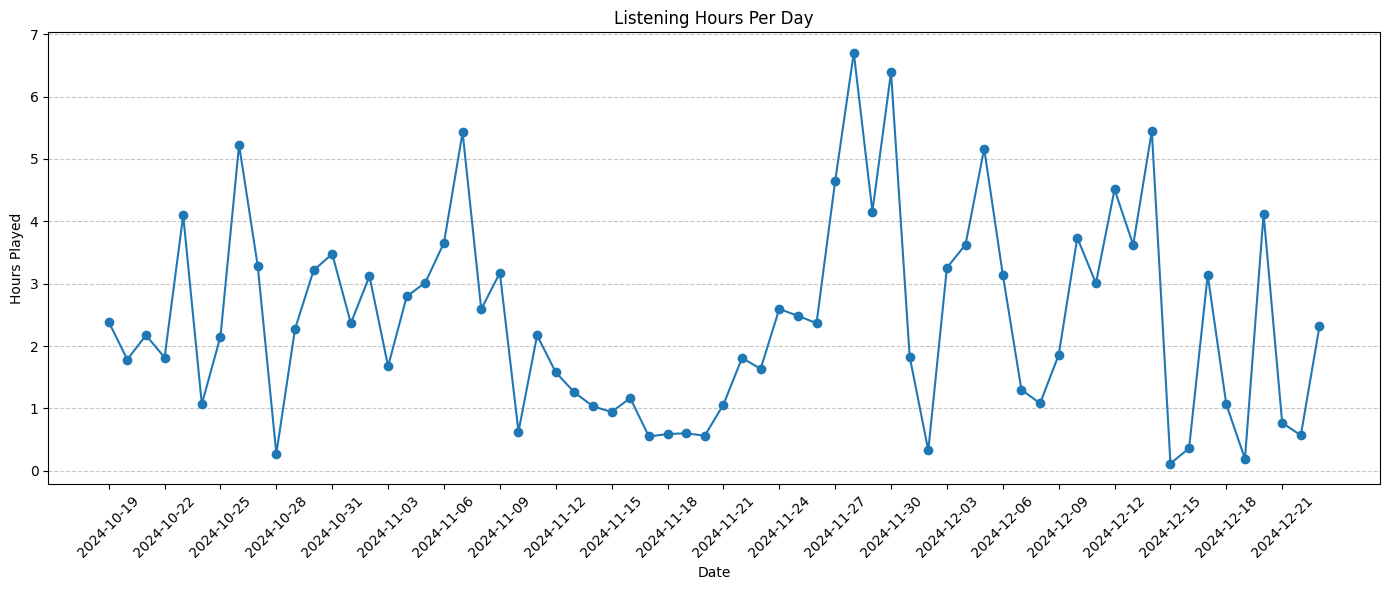

In [ ]:

# Load the Spotify data from the JSON file
spotify_data = pd.read_json("/Streaming_History_Audio_2024_5.json")

# Convert the 'ts' (timestamp) column to datetime
spotify_data['timestamp'] = pd.to_datetime(spotify_data['ts'])

# Convert 'timestamp' to timezone-naive datetime
spotify_data['timestamp'] = spotify_data['timestamp'].dt.tz_localize(None)

spotify_data['date'] = spotify_data['timestamp'].dt.date
spotify_data['hours_played'] = spotify_data['ms_played'] / 3600000  # Convert ms to hours

# Group by day and sum up listening hours
daily_data = spotify_data.groupby('date')['hours_played'].sum().reset_index()


plt.figure(figsize=(14, 6))
plt.plot(daily_data['date'], daily_data['hours_played'], marker='o', linestyle='-')

# Manually set tick frequency to show more dates
plt.xticks(ticks=daily_data['date'][::3], labels=daily_data['date'][::3], rotation=45)  # Show every 3rd date

# Customize the plot
plt.title('Listening Hours Per Day')
plt.xlabel('Date')
plt.ylabel('Hours Played')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



Total listening hours per day (last 30 days):
timestamp
2024-11-27 20:29:39    0.010153
2024-11-27 20:32:03    0.036474
2024-11-27 20:51:21    0.088081
2024-11-27 20:53:59    0.043887
2024-11-27 21:57:56    0.049333
                         ...   
2024-12-23 20:23:56    0.094222
2024-12-23 20:29:09    0.007296
2024-12-23 20:29:24    0.024362
2024-12-23 22:19:09    0.036676
2024-12-23 22:21:46    0.046248
Name: hours_played, Length: 2762, dtype: float64


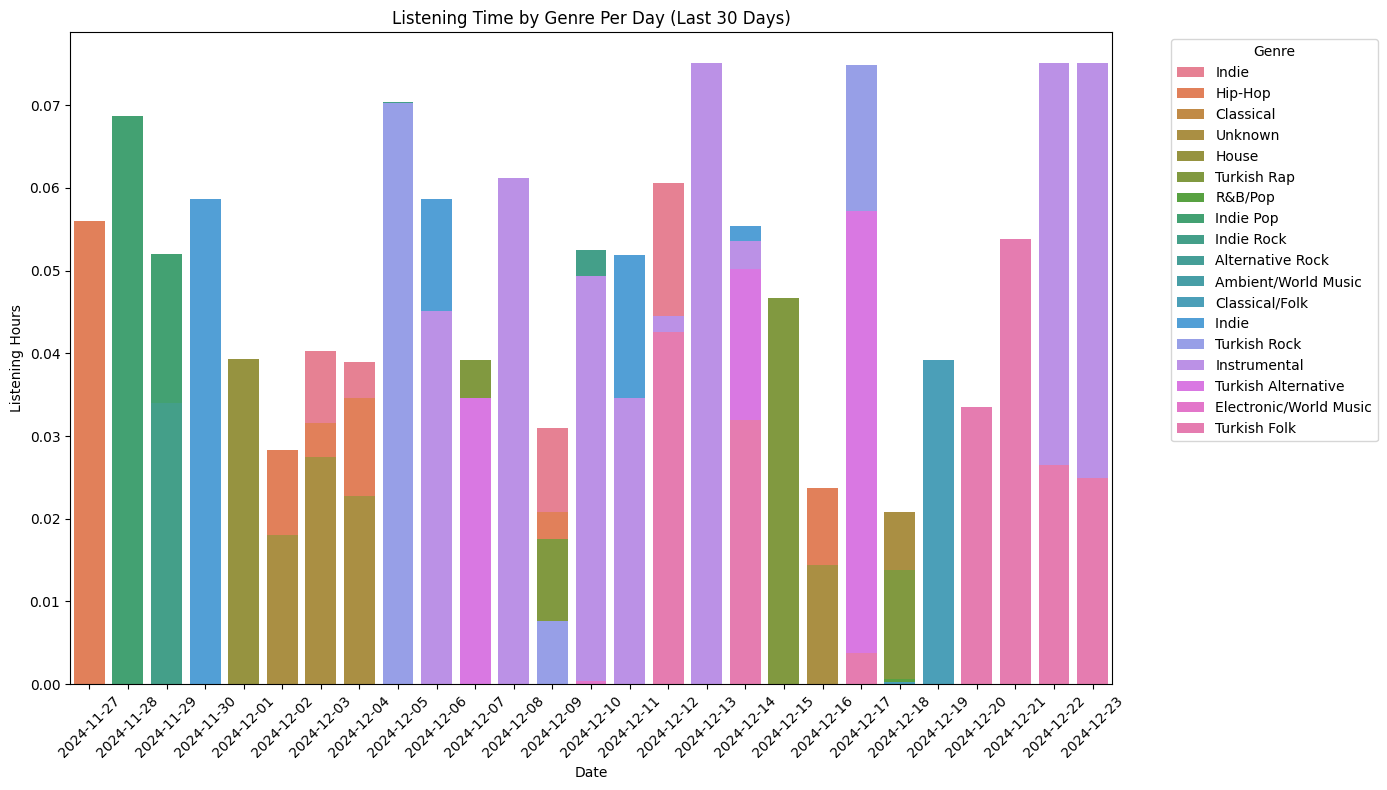

In [ ]:


# Load the Spotify streaming history data
file_path = "/Streaming_History_Audio_2024_5.json"
spotify_data = pd.read_json(file_path)

# Convert 'ts' column to datetime
spotify_data['timestamp'] = pd.to_datetime(spotify_data['ts'])

# Convert to timezone-naive datetime
spotify_data['timestamp'] = spotify_data['timestamp'].dt.tz_localize(None)

# Genre mapping for top artists
genre_mapping = {
"Santi & Tuğçe": "Electronic/World Music",
    "Kendrick Lamar": "Hip-Hop",
    "sign crushes motorist": "Indie",
    "Ufo361": "Hip-Hop",
    "Ezhel": "Hip-Hop",
    "Mac DeMarco": "Indie ",
    "Ati242": "Hip-Hop",
    "Travis Scott": "Hip-Hop",
    "Daft Punk": "House",
    "No Clear Mind": "Indie",
    "MiRET": "Electronic/World Music",
    "Future": "Hip-Hop",
    "Birsen Tezer": "Turkish Folk",
    "Johann Sebastian Bach": "Classical",
    "The Weeknd": "R&B/Pop",
    "Mehmet Güreli": "Turkish Alternative",
    "Drake": "Hip-Hop",
    "Take Care": "Indie",
    "Kayra": "Turkish Rap",
    "Hermanos Gutiérrez": "Instrumental",
    "Cigarettes After Sex": "Indie Pop",
    "Açık Seçik Aşk Bandosu": "Indie",
    "Don Toliver": "Hip-Hop",
    "Nemzzz": "Hip-Hop",
    "Central Cee": "Hip-Hop",
    "Ash": "Alternative Rock",
    "Kanye West": "Hip-Hop",
    "Sansar Salvo": "Turkish Rap",
    "Metro Boomin": "Hip-Hop",
    "Them & I": "Indie",
    "Vacations": "Indie Rock",
    "Sufle": "Turkish Rock",
    "Fikret Kızılok": "Turkish Folk",
    "Rana Türkyılmaz": "Turkish Folk",
    "Buddha-Bar": "Ambient/World Music",
    "hold": "Indie",
    "Fırat Tanış": "Turkish Folk",
    "21 Savage": "Hip-Hop",
    "Sena Şener": "Indie",
    "Arctic Monkeys": "Indie Rock",
    "Bülent Ortaçgil": "Turkish Folk",
    "Şam": "Turkish Rap",
    "Era7capone": "Hip-Hop",
    "Farazi": "Hip-Hop",
    "Rashid Beibutov": "Classical/Folk",
    "Sahalé": "Electronic/World Music",
    "Sagopa Kajmer": "Turkish Rap",
    "Teoman": "Turkish Rock",
    "Şebnem Ferah": "Turkish Rock",
    "miserable teens club": "Indie",
}

# Filter last 30 days of data
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
last_30_days_data = spotify_data[(spotify_data['timestamp'] >= start_date) & (spotify_data['timestamp'] <= end_date)]

# Map genres to artists
last_30_days_data['genre'] = last_30_days_data['master_metadata_album_artist_name'].map(genre_mapping)
last_30_days_data['genre'] = last_30_days_data['genre'].fillna("Unknown")

# Group by date and genre, summing up listening time
daily_genre_stats_30_days = last_30_days_data.groupby(['timestamp', 'genre'])['ms_played'].sum().reset_index()

# Correct calculation for hours played
daily_genre_stats_30_days['hours_played'] = daily_genre_stats_30_days['ms_played'] / (1000 * 60 * 60)  # Convert ms to hours

# Validation: Print total listening hours per day
total_hours_per_day = daily_genre_stats_30_days.groupby('timestamp')['hours_played'].sum()
print("Total listening hours per day (last 30 days):")
print(total_hours_per_day)

# Plot all genres listened per day as stacked bars without black error lines
plt.figure(figsize=(14, 8))
sns.barplot(
    data=daily_genre_stats_30_days,
    x=daily_genre_stats_30_days['timestamp'].dt.strftime('%Y-%m-%d'),  # Format date for readability
    y='hours_played',
    hue='genre',
    dodge=False,
    ci=None  # Remove black error bars
)
plt.title('Listening Time by Genre Per Day (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Listening Hours')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
!pip install meteostat

In [ ]:

# Define Sabancı University's coordinates
location = Point(40.890579, 29.376114)

# Set the time range for the last 3 months
end_date = datetime.now()
start_date = end_date - timedelta(days=90)

# Fetch daily weather data
data = Daily(location, start_date, end_date)
data = data.fetch()

# Save the data as a CSV file
data.to_csv('sabanci_daily_weather_data.csv')
print("Daily weather data saved to sabanci_daily_weather_data.csv")


Daily weather data saved to sabanci_daily_weather_data.csv


In [ ]:


# Download the saved weather data CSV file
files.download('sabanci_daily_weather_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

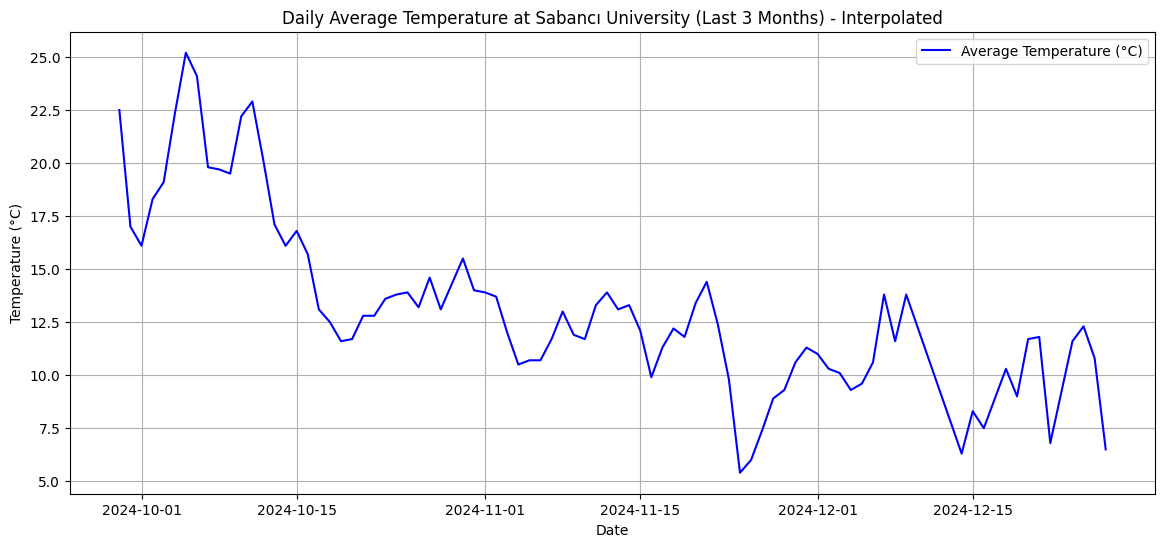

In [ ]:
# Ensure the 'date' column is in datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Interpolate the missing values in 'average_temperature'
weather_data['average_temperature'] = weather_data['average_temperature'].interpolate(method='linear')

# Plot the interpolated average temperature data
plt.figure(figsize=(14, 6))
plt.plot(weather_data['date'], weather_data['average_temperature'], label='Average Temperature (°C)', color='blue')
plt.title('Daily Average Temperature at Sabancı University (Last 3 Months) - Interpolated')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()


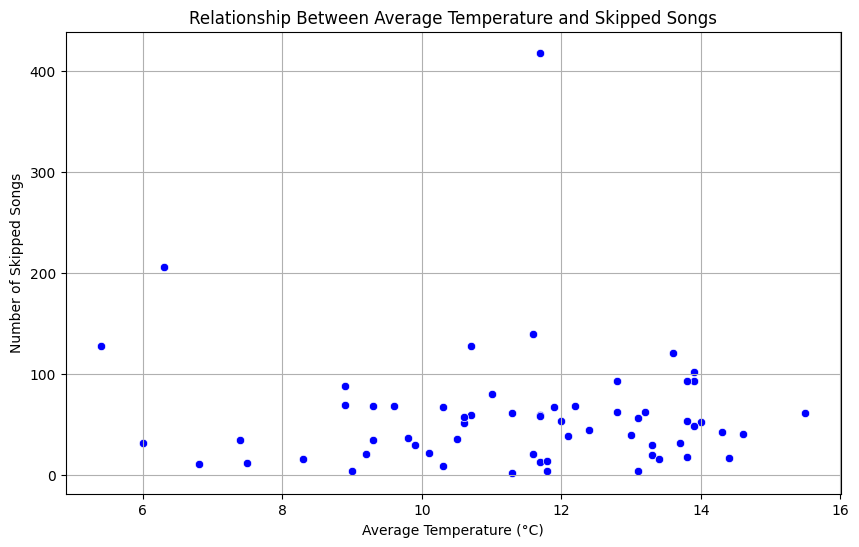

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spotify and weather data
spotify_data = pd.read_json('/Streaming_History_Audio_2024_5.json')  # Replace with the correct Spotify file path
weather_data = pd.read_csv('/sabanci_daily_weather_data (2).csv', parse_dates=['time'])  # Replace with the correct Weather file path

# Process Spotify data
spotify_data['date'] = pd.to_datetime(spotify_data['ts']).dt.date  # Use 'ts' as the timestamp column
daily_skipped = spotify_data.groupby('date').agg({'skipped': 'sum'}).reset_index()  # Sum of skipped songs per day
daily_skipped = daily_skipped.rename(columns={'skipped': 'skipped_songs'})

# Process weather data
weather_data['date'] = weather_data['time'].dt.date
weather_data = weather_data[['date', 'tavg']].rename(columns={'tavg': 'average_temperature'})  # Use average daily temperature

# Merge Spotify and weather data
merged_data = pd.merge(daily_skipped, weather_data, on='date', how='inner')

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='average_temperature', y='skipped_songs', color='blue')
plt.title('Relationship Between Average Temperature and Skipped Songs')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Skipped Songs')
plt.grid()
plt.show()




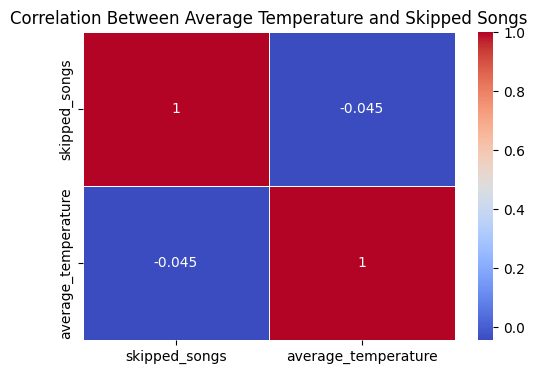

In [ ]:
# Correlation analysis
correlation = merged_data[['skipped_songs', 'average_temperature']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Average Temperature and Skipped Songs')
plt.show()

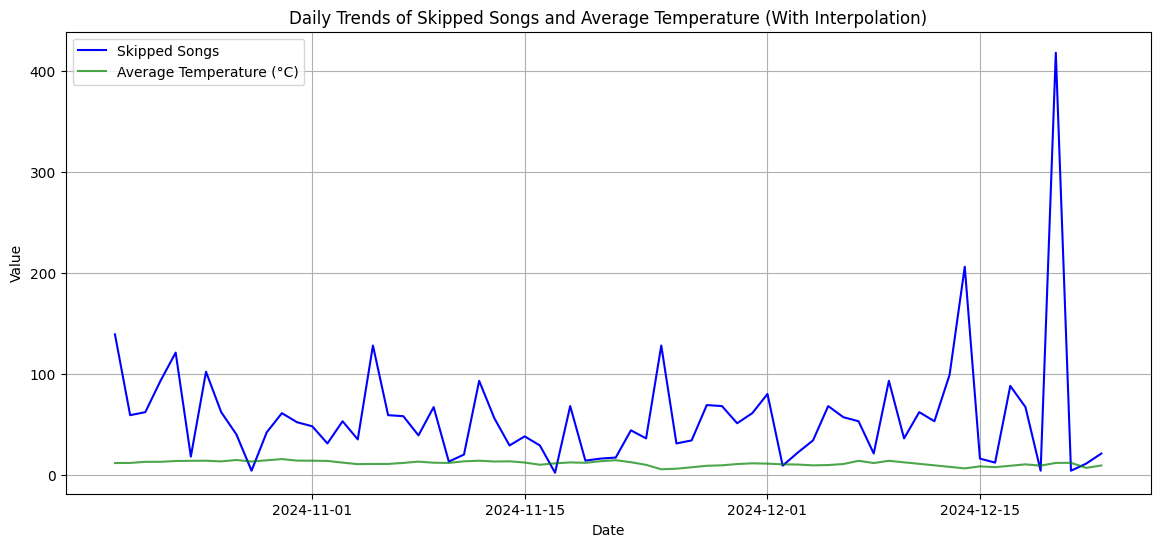

In [ ]:
weather_data['average_temperature'] = weather_data['average_temperature'].interpolate(method='linear')

# Merge Spotify and weather data
merged_data = pd.merge(daily_skipped, weather_data, on='date', how='inner')

plt.figure(figsize=(14, 6))
plt.plot(merged_data['date'], merged_data['skipped_songs'], label='Skipped Songs', color='blue')
plt.plot(merged_data['date'], merged_data['average_temperature'], label='Average Temperature (°C)', color='green', alpha=0.7)
plt.title('Daily Trends of Skipped Songs and Average Temperature (With Interpolation)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

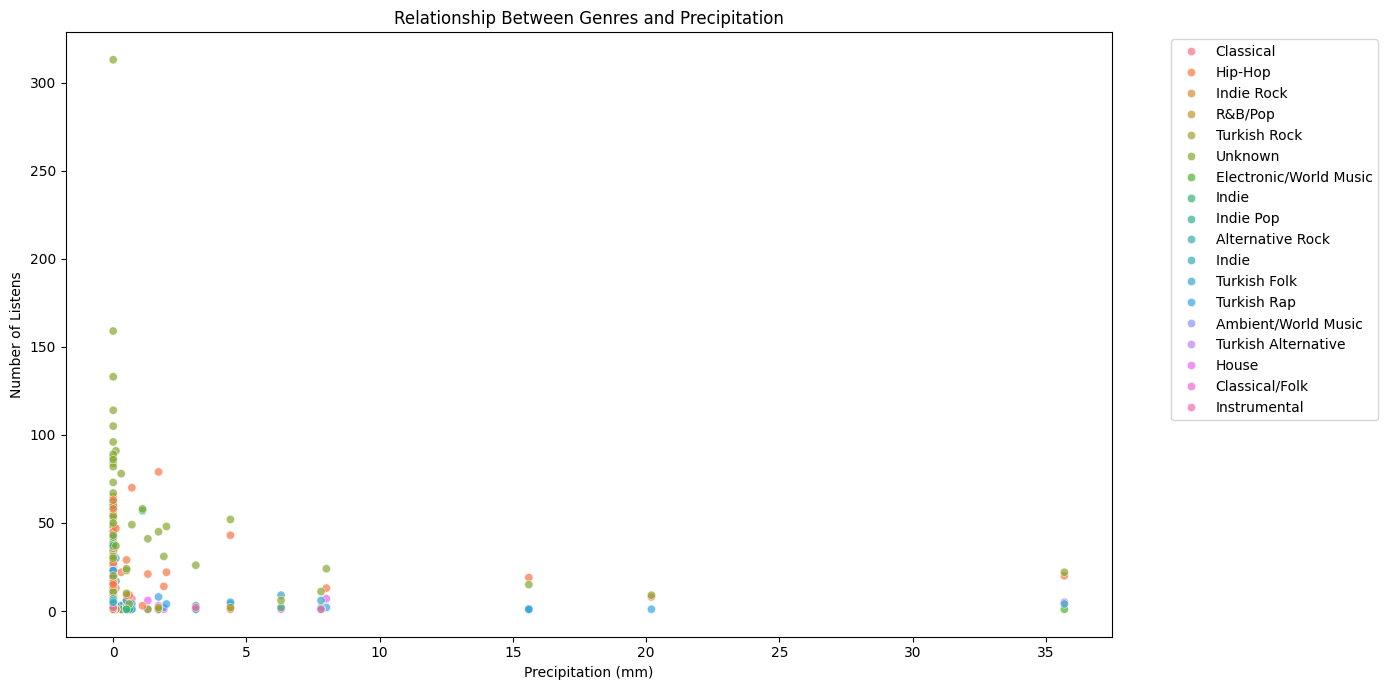

In [ ]:

# Load Spotify data
spotify_data = pd.read_json("/content/Streaming_History_Audio_2024_5.json")
spotify_data['timestamp'] = pd.to_datetime(spotify_data['ts'], utc=True)  # Convert timestamp to datetime
spotify_data['date'] = spotify_data['timestamp'].dt.date  # Extract date as datetime.date

# Load Weather data
weather_data = pd.read_csv("/content/sabanci_daily_weather_data.csv")
weather_data['time'] = pd.to_datetime(weather_data['time'])  # Convert 'time' column to datetime
weather_data['date'] = weather_data['time'].dt.date  # Convert to datetime.date for comparison
weather_data = weather_data[['date', 'prcp']]  # Keep only relevant columns
weather_data['prcp'] = weather_data['prcp'].fillna(0)  # Fill missing precipitation with 0

# Preprocess Spotify data
# Filter Spotify data for the last 3 months
end_date = spotify_data['date'].max()
start_date = (pd.to_datetime(end_date) - pd.DateOffset(months=3)).date()  # Calculate start_date as datetime.date
spotify_filtered = spotify_data[(spotify_data['date'] >= start_date) & (spotify_data['date'] <= end_date)].copy()

# Assign genres to the top 50 artists
top_50_artists = spotify_filtered['master_metadata_album_artist_name'].value_counts().head(50).index
genre_mapping = {
    "Santi & Tuğçe": "Electronic/World Music",
    "Kendrick Lamar": "Hip-Hop",
    "sign crushes motorist": "Indie",
    "Ufo361": "Hip-Hop",
    "Ezhel": "Hip-Hop",
    "Mac DeMarco": "Indie ",
    "Ati242": "Hip-Hop",
    "Travis Scott": "Hip-Hop",
    "Daft Punk": "House",
    "No Clear Mind": "Indie",
    "MiRET": "Electronic/World Music",
    "Future": "Hip-Hop",
    "Birsen Tezer": "Turkish Folk",
    "Johann Sebastian Bach": "Classical",
    "The Weeknd": "R&B/Pop",
    "Mehmet Güreli": "Turkish Alternative",
    "Drake": "Hip-Hop",
    "Take Care": "Indie",
    "Kayra": "Turkish Rap",
    "Hermanos Gutiérrez": "Instrumental",
    "Cigarettes After Sex": "Indie Pop",
    "Açık Seçik Aşk Bandosu": "Indie",
    "Don Toliver": "Hip-Hop",
    "Nemzzz": "Hip-Hop",
    "Central Cee": "Hip-Hop",
    "Ash": "Alternative Rock",
    "Kanye West": "Hip-Hop",
    "Sansar Salvo": "Turkish Rap",
    "Metro Boomin": "Hip-Hop",
    "Them & I": "Indie",
    "Vacations": "Indie Rock",
    "Sufle": "Turkish Rock",
    "Fikret Kızılok": "Turkish Folk",
    "Rana Türkyılmaz": "Turkish Folk",
    "Buddha-Bar": "Ambient/World Music",
    "hold": "Indie",
    "Fırat Tanış": "Turkish Folk",
    "21 Savage": "Hip-Hop",
    "Sena Şener": "Indie",
    "Arctic Monkeys": "Indie Rock",
    "Bülent Ortaçgil": "Turkish Folk",
    "Şam": "Turkish Rap",
    "Era7capone": "Hip-Hop",
    "Farazi": "Hip-Hop",
    "Rashid Beibutov": "Classical/Folk",
    "Sahalé": "Electronic/World Music",
    "Sagopa Kajmer": "Turkish Rap",
    "Teoman": "Turkish Rock",
    "Şebnem Ferah": "Turkish Rock",
    "miserable teens club": "Indie",
}
spotify_filtered['genre'] = spotify_filtered['master_metadata_album_artist_name'].map(genre_mapping)
spotify_filtered['genre'] = spotify_filtered['genre'].fillna("Unknown")  # Fill unknown genres

# Group Spotify data by date and genre
spotify_grouped = (
    spotify_filtered.groupby(['date', 'genre'])
    .size()
    .reset_index(name='count')
)

# Merge Spotify and Weather data
merged_data = pd.merge(spotify_grouped, weather_data, on='date', how='inner')

# Analysis: Correlation between genres and precipitation
genre_precip_corr = merged_data.pivot(index='date', columns='genre', values='count').fillna(0)
genre_precip_corr['precipitation'] = weather_data.set_index('date')['prcp']
correlation_matrix = genre_precip_corr.corr()



# Visualize genre listening over precipitation
plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_data, x='prcp', y='count', hue='genre', alpha=0.7)
plt.title("Relationship Between Genres and Precipitation")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Number of Listens")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the Spotify and weather data have been loaded
spotify_data = pd.read_json("/Streaming_History_Audio_2024_5.json")
weather_data = pd.read_csv("/sabanci_daily_weather_data (2).csv")

# Step 1: Process the Spotify Data
spotify_data['date'] = pd.to_datetime(spotify_data['ts']).dt.date
spotify_data['genre'] = spotify_data['master_metadata_album_artist_name'].map(genre_mapping)

# Aggregate by date and find the most listened genre for each day
spotify_aggregated = spotify_data.groupby(['date', 'genre'])['ms_played'].sum().reset_index()
spotify_aggregated['hours_played'] = spotify_aggregated['ms_played'] / (1000 * 60 * 60)  # Convert ms to hours

most_listened_genre = spotify_aggregated.loc[spotify_aggregated.groupby('date')['hours_played'].idxmax()]
most_listened_genre = most_listened_genre[['date', 'genre', 'hours_played']]

# Step 2: Process the Weather Data
weather_data['date'] = pd.to_datetime(weather_data['time']).dt.date
weather_data = weather_data[['date', 'prcp']].rename(columns={'prcp': 'precipitation'})

# Step 3: Merge the Data
merged_data = pd.merge(most_listened_genre, weather_data, on='date', how='inner')








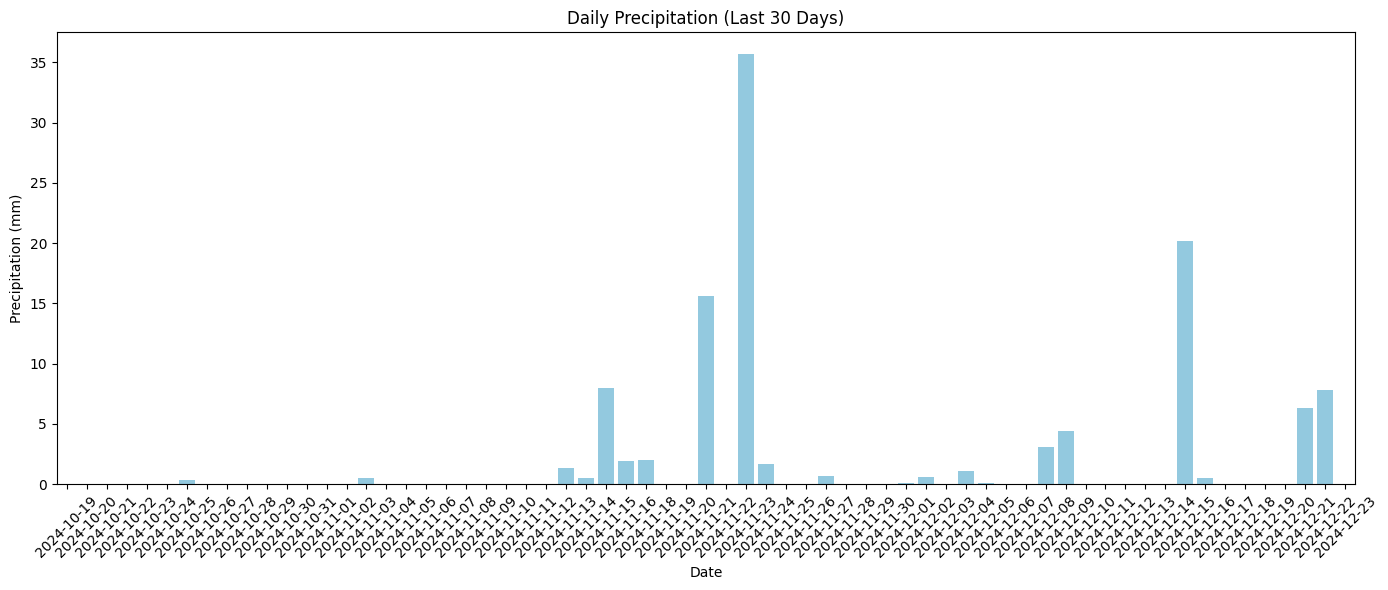

In [ ]:
# Step 4: Visualization
# Plot precipitation day by day
plt.figure(figsize=(14, 6))
sns.barplot(x=merged_data['date'], y=merged_data['precipitation'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Daily Precipitation (Last 30 Days)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.tight_layout()
plt.show()


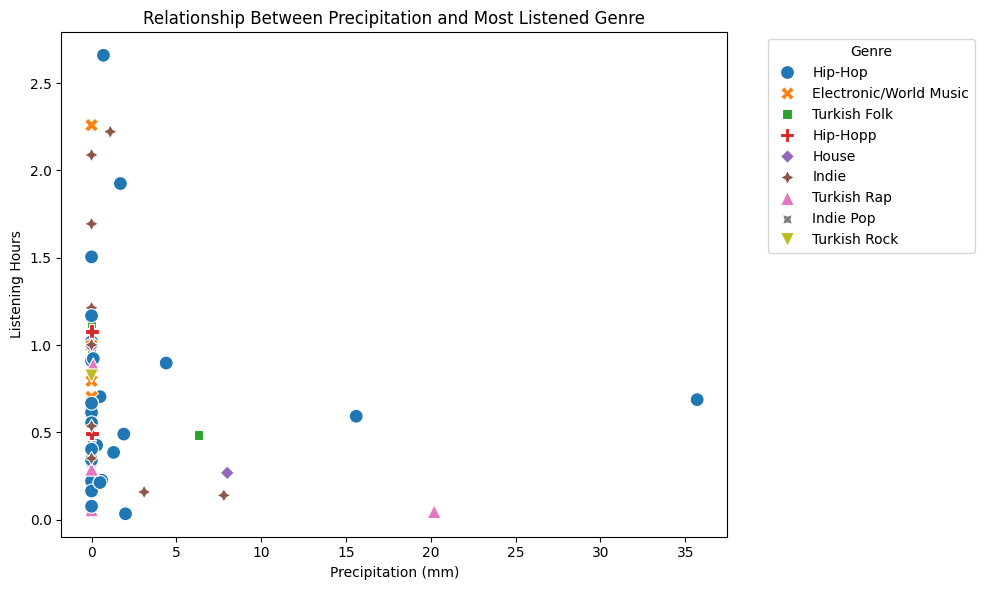

In [ ]:
# Step 5: Analyze the Relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='precipitation', y='hours_played', hue='genre', style='genre', s=100)
plt.title('Relationship Between Precipitation and Most Listened Genre')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Listening Hours')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

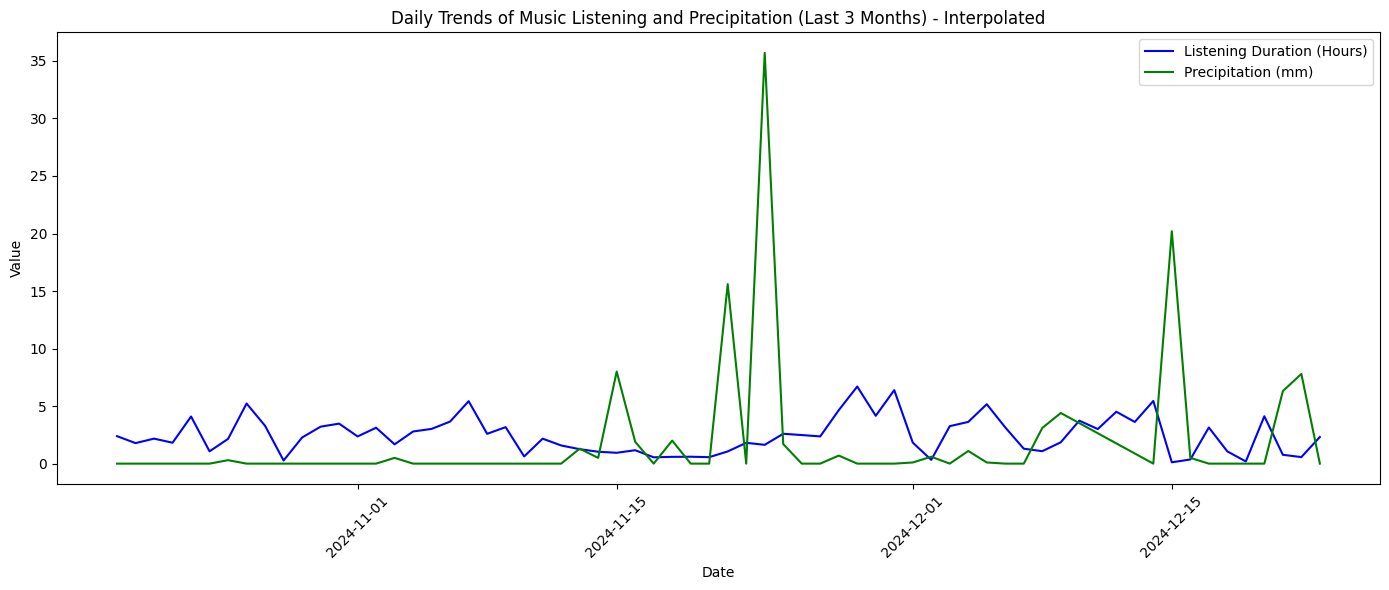

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Spotify and Weather Data
spotify_data = pd.read_json("/Streaming_History_Audio_2024_5.json")
weather_data = pd.read_csv("/sabanci_daily_weather_data (2).csv")

# Ensure Spotify Data has 'date' column
if 'ts' in spotify_data.columns:
    spotify_data['date'] = pd.to_datetime(spotify_data['ts']).dt.date
else:
    raise KeyError("'ts' column not found in Spotify data.")

spotify_data['hours_played'] = spotify_data['ms_played'] / (1000 * 60 * 60)  # Convert ms to hours

# Aggregate listening hours by date
spotify_aggregated = spotify_data.groupby('date')['hours_played'].sum().reset_index()

# Ensure Weather Data has 'time' column for date
if 'time' in weather_data.columns:
    weather_data['date'] = pd.to_datetime(weather_data['time']).dt.date
else:
    raise KeyError("'time' column not found in Weather data.")

weather_data = weather_data[['date', 'prcp']].rename(columns={'prcp': 'precipitation'})

# Fill missing precipitation data with linear interpolation
weather_data['precipitation'] = weather_data['precipitation'].interpolate(method='linear')

# Filter Last 3 Months Data
end_date = pd.to_datetime(spotify_aggregated['date'].max())
start_date = end_date - pd.DateOffset(months=3)

# Convert start_date and end_date to datetime.date for consistency
start_date = start_date.date()
end_date = end_date.date()

spotify_aggregated = spotify_aggregated[(spotify_aggregated['date'] >= start_date) &
                                        (spotify_aggregated['date'] <= end_date)]
weather_data = weather_data[(weather_data['date'] >= start_date) &
                            (weather_data['date'] <= end_date)]

# Merge the Data
merged_data = pd.merge(spotify_aggregated, weather_data, on='date', how='inner')

# Visualization
plt.figure(figsize=(14, 6))
plt.plot(merged_data['date'], merged_data['hours_played'], color='blue', label='Listening Duration (Hours)')
plt.plot(merged_data['date'], merged_data['precipitation'], color='green', label='Precipitation (mm)')
plt.title('Daily Trends of Music Listening and Precipitation (Last 3 Months) - Interpolated')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






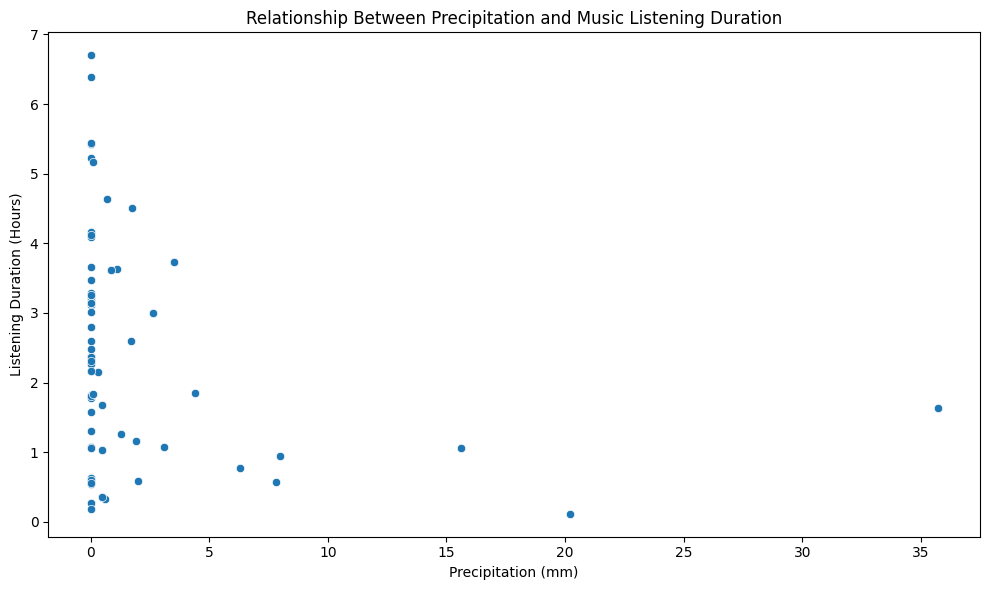

In [ ]:
# Scatter plot to analyze the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='precipitation', y='hours_played')
plt.title('Relationship Between Precipitation and Music Listening Duration')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Listening Duration (Hours)')
plt.tight_layout()
plt.show()